## 각 시즌 별 선수 기록 데이터 프레임 추출 후 시각화

In [65]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import plotly.graph_objects as go
import plotly.express as px
import math

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# 파이썬 시각화 패키지 불러오기
import matplotlib.pyplot as plt
%matplotlib inline
# 사용자 운영체제 확인
import platform
platform.system()
# 운영체제별 한글 폰트 설정
if platform.system() == 'Darwin': # Mac 환경 폰트 설정
    plt.rc('font', family='AppleGothic')
elif platform.system() == 'Windows': # Windows 환경 폰트 설정
    plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False) # 마이너스 폰트 설정
# 글씨 선명하게 출력하는 설정
%config InlineBackend.figure_format = 'retina'

In [39]:
df = pd.read_csv('DB_hit.csv', index_col=False)
df

,idx,code,year,date,result,h_order,position,startup,pa,run,...,sh,sf,avg,obp,slg,ops,pit,avli,re24,wpa
0,0,78168,2018,03-24,W 6:3,1,2B,1,5,0,...,0,0,0.200,0.200,0.200,0.400,24,0.73,-0.78,-0.032
1,1,78168,2018,03-25,L 1:4,1,2B,1,4,0,...,0,0,0.111,0.111,0.111,0.222,13,1.00,-1.27,-0.127
2,2,78168,2018,03-27,W 5:4,3,2B,1,5,2,...,0,0,0.286,0.286,0.357,0.643,21,1.51,0.90,0.118
3,3,78168,2018,03-28,L 3:9,3,2B,1,3,1,...,0,0,0.235,0.278,0.294,0.572,13,1.11,-0.91,-0.073
4,4,78168,2018,03-29,W 9:4,3,2B,1,3,1,...,0,0,0.250,0.348,0.300,0.648,16,0.73,0.79,0.016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99181,99181,65132,2023,06-28,L 6:9,6,C,0,0,0,...,0,0,0.238,0.385,0.310,0.694,0,0.00,0.00,0.000
99182,99182,65132,2023,06-30,D :,8,PH,0,2,0,...,0,0,0.227,0.370,0.295,0.666,8,0.17,-0.72,-0.009
99183,99183,65132,2023,07-01,D :,4,C,0,1,0,...,0,0,0.244,0.382,0.311,0.693,4,0.01,0.22,0.000
99184,99184,65132,2023,07-02,D :,5,DH,1,3,0,...,0,0,0.229,0.362,0.292,0.654,12,1.59,-1.45,-0.119


In [131]:
# 필요 없는 컬럼을 제거한 dataframe 

hit_drop = df.drop(['idx', 'date', 'result', 'h_order', 'position',
       'startup','run', 'rbi','sb_s', 'sb_f', 'avg', 'obp', 'slg', 'ops', 'pit', 'avli'], axis=1)
hit_drop

,code,year,pa,hit,second,third,homerun,luta,bb,hbp,ibb,k,dp,sh,sf,re24,wpa
0,78168,2018,5,1,0,0,0,1,0,0,0,1,0,0,0,-0.78,-0.032
1,78168,2018,4,0,0,0,0,0,0,0,0,1,0,0,0,-1.27,-0.127
2,78168,2018,5,3,1,0,0,4,0,0,0,0,0,0,0,0.90,0.118
3,78168,2018,3,0,0,0,0,0,1,0,0,1,0,0,0,-0.91,-0.073
4,78168,2018,3,1,0,0,0,1,2,0,0,0,0,0,0,0.79,0.016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99181,65132,2023,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.000
99182,65132,2023,2,0,0,0,0,0,0,0,0,0,0,0,0,-0.72,-0.009
99183,65132,2023,1,1,0,0,0,1,0,0,0,0,0,0,0,0.22,0.000
99184,65132,2023,3,0,0,0,0,0,0,0,0,2,0,0,0,-1.45,-0.119


### 시즌 별 기록 Line_polar return하는 함수 생성

In [145]:
# 시즌 별 데이터 프레임 return하는 함수 생성

def season_dataframe(hit_drop, year):
    hit_season = hit_drop[hit_drop['year'] == year]
    return hit_season

In [146]:
season_dataframe(hit_drop, 2019)

,code,year,pa,hit,second,third,homerun,luta,bb,hbp,ibb,k,dp,sh,sf,re24,wpa
18024,79240,2019,4,0,0,0,0,0,0,0,0,0,0,0,0,-0.74,-0.076
18025,79240,2019,4,1,0,0,0,1,0,0,0,0,1,0,0,-0.93,0.020
18026,79240,2019,3,0,0,0,0,0,0,0,0,1,0,0,0,-0.70,-0.080
18027,79240,2019,5,3,1,0,0,4,0,0,0,0,1,0,0,0.48,0.031
18028,79240,2019,5,2,0,0,0,2,0,0,0,0,1,0,0,-0.88,0.060
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35449,65132,2019,2,0,0,0,0,0,1,0,0,1,0,0,0,-0.16,-0.030
35450,68330,2019,3,0,0,0,0,0,1,0,0,1,0,0,0,-0.55,0.016
35451,68330,2019,3,1,1,0,0,2,1,0,0,2,0,0,0,1.10,0.052
35452,68330,2019,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.000


In [122]:
# # hit_df_season = hit_drop[hit_drop['year'] == 2018] # (hit_drop['code']==72443) & 
# # hit_drop_season = hit_df_season.drop(['year', 'dp', 'sh'], axis=1)
# hit_sum_season = hit_2018.groupby('code').sum()

# # 타율(avg)
# hit_avg = hit_sum_season['hit'] / hit_sum_season['pa']
# hit_sum_season['타율'] = round(hit_avg, 3)

# # 출루율(obp) / 출루율 = (안타 + 볼넷 + 사구) ÷ (타수 + 볼넷 + 사구 + 희생플라이)
# hit_obp = (hit_sum_season['hit']+ hit_sum_season['bb'] + hit_sum_season['hbp'] + hit_sum_season['ibb']) / (hit_sum_season['pa'] + hit_sum_season['bb'] + hit_sum_season['hbp'] + hit_sum_season['ibb'] + hit_sum_season['sf'])
# hit_sum_season['출루율'] = round(hit_obp, 3)

# # 장타율(slg)
# hit_slg = (hit_sum_season['hit'] + hit_sum_season['second'] + 2*hit_sum_season['third'] + 3*hit_sum_season['homerun']) / hit_sum_season['pa']
# hit_sum_season['장타율'] = round(hit_slg, 3)

# # 볼삼비(BB/K) - 볼넷이 0인 경우 볼삼비 infinity가 발생 -> 처리 필요
# hit_bbk = hit_sum_season['bb'] / hit_sum_season['k']
# hit_sum_season['BB/K'] = round(hit_bbk, 3)
# hit_sum_season.loc[(hit_sum['bb'] >= 1) & (hit_sum_season['k'] == 0), 'BB/K'] = 1

# # hit_sum['BB/K'] = hit_sum['BB/K'].astype(int) 
# # 컬럼명 대문자로 변경
# hit_sum_season['RE24'] = round(hit_sum_season['re24'], 3) 
# hit_sum_season['WPA'] = round(hit_sum_season['wpa'], 3) 

# df_2018_hit = hit_sum_season.drop(['year', 'pa', 'hit', 'second', 'third', 'homerun', 'luta', 'bb', 'hbp', 'ibb', 'k', 'dp', 'sh', 'sf', 're24', 'wpa'], axis=1)

# # 시각화위해 scaling

# scaler = MinMaxScaler()
# hit_scaled_2018 = pd.DataFrame(scaler.fit_transform(df_2018_hit), columns=df_2018_hit.columns, index=df_2018_hit.index)*10
# hit_scaled_2018.reset_index(inplace=True)
# hit_scaled_2018

,code,타율,출루율,장타율,BB/K,RE24,WPA
0,60184,4.00,3.200,4.043127,0.000000,2.101784,2.243369
1,60343,4.32,4.256,5.242588,1.406385,1.552991,1.389318
2,60456,10.00,10.000,6.738544,8.628128,2.623295,2.422981
3,60523,6.10,5.824,6.657682,3.537532,2.636936,1.847270
4,60558,5.08,4.960,5.673854,2.251941,1.418678,2.180326
...,...,...,...,...,...,...,...
233,79530,5.72,5.328,5.781671,1.725626,2.228751,2.158915
234,79608,6.82,6.272,7.547170,5.452977,6.960126,7.023909
235,79705,5.06,5.584,5.822102,3.511648,2.673662,2.301653
236,99606,5.86,5.872,5.633423,2.821398,2.075551,1.819912


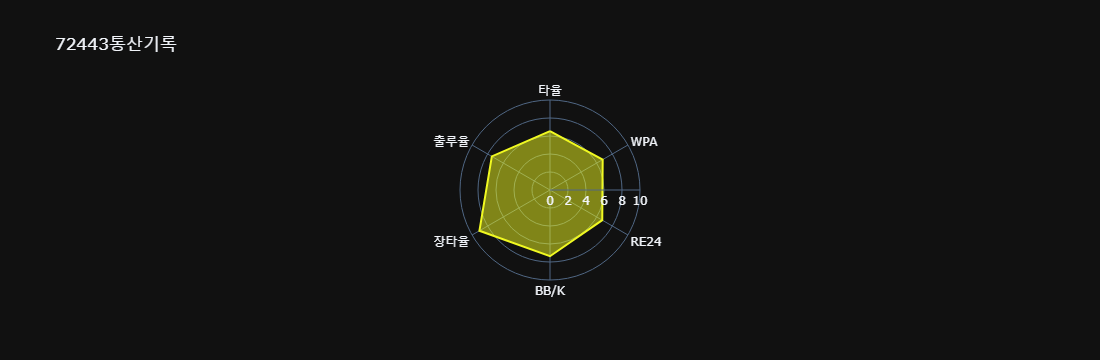

In [144]:
# df_2018_player = hit_scaled_2018[hit_scaled_2018['code'] == 72443]
# fig = px.line_polar(df_2018_player, r = list(hit_scaled_2018[hit_scaled_2018['code'] == 72443][hit_scaled_2018.columns.difference(['code'])].iloc[0]),
#                    theta = hit_scaled_season.columns[0:], line_close=True, color_discrete_sequence=px.colors.sequential.Plasma_r,
#                    template='plotly_dark', range_r = [0, 10.0], title=f"{72443}통산기록 ",
#                    direction="counterclockwise", start_angle=90)
# fig.update_traces(fill='toself')
fig.show()

In [197]:
# 선수 별 시즌 기록을 시각화하는 함수 생성 코드

def extract_season_records(player_code, year):
    try:
        # def season_dataframe(hit_drop, year):
        hit_season = hit_drop[hit_drop['year'] == year]

        hit_drop_season = hit_season.drop(['year', 'dp', 'sh'], axis=1)
        hit_sum_season = hit_drop_season.groupby('code').sum()

        # 타율(avg)
        hit_avg = hit_sum_season['hit'] / hit_sum_season['pa']
        hit_sum_season['타율'] = round(hit_avg, 3)

        # 출루율(obp) / 출루율 = (안타 + 볼넷 + 사구) ÷ (타수 + 볼넷 + 사구 + 희생플라이)
        hit_obp = (hit_sum_season['hit']+ hit_sum_season['bb'] + hit_sum_season['hbp'] + hit_sum_season['ibb']) / (hit_sum_season['pa'] + hit_sum_season['bb'] + hit_sum_season['hbp'] + hit_sum_season['ibb'] + hit_sum_season['sf'])
        hit_sum_season['출루율'] = round(hit_obp, 3)

        # 장타율(slg)
        hit_slg = (hit_sum_season['hit'] + hit_sum_season['second'] + 2*hit_sum_season['third'] + 3*hit_sum_season['homerun']) / hit_sum_season['pa']
        hit_sum_season['장타율'] = round(hit_slg, 3)

        # 볼삼비(BB/K) - 볼넷이 0인 경우 볼삼비 infinity가 발생 -> 처리 필요
        hit_bbk = hit_sum_season['bb'] / hit_sum_season['k']
        hit_sum_season['BB/K'] = round(hit_bbk, 3)
        hit_sum_season.loc[(hit_sum_season['bb']>=1) & (hit_sum_season['k']==0), 'BB/K'] = 1
 
        # 컬럼명 대문자로 변경  -> 시각화 그래프에서 보기 쉽게 한글로 표현하는 것이 좋다고 판단.
        hit_sum_season['RE24'] = round(hit_sum_season['re24'], 3) 
        hit_sum_season['WPA'] = round(hit_sum_season['wpa'], 3) 

        df_season_hit = hit_sum_season.drop(['pa', 'hit', 'second', 'third', 'homerun', 'luta', 'bb', 'hbp', 'ibb',
           'k', 'sf', 're24', 'wpa'], axis=1)

        # 시각화위해 scaling
        hit_scaled_season = pd.DataFrame(scaler.fit_transform(df_season_hit), columns=df_season_hit.columns, index=df_season_hit.index)*10
        hit_scaled_season.reset_index(inplace=True)
    
        # 시각화
        df_player = hit_scaled_season[hit_scaled_season['code'] == player_code]
        fig = px.line_polar(df_player, r = list(hit_scaled_season[hit_scaled_season['code'] == player_code][hit_scaled_season.columns.difference(['code'])].iloc[0]),
                           theta = hit_scaled_season.columns[1:], line_close=True, color_discrete_sequence=px.colors.sequential.Plasma_r,
                           template='plotly_dark', range_r = [0, 10.0], title=f"{player_code}통산기록 ",
                           direction="counterclockwise", start_angle=90)
        fig.update_traces(fill='toself')

        return fig.show()
    
    except IndexError:
        print(f"No data found for player {player_code}")

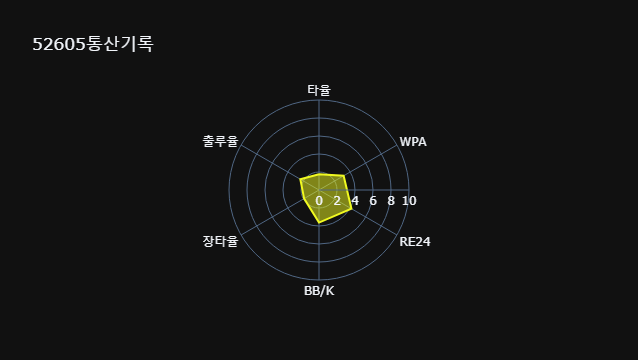

In [198]:
extract_season_records(52605, 2022)  # 2022년 김도영 선수 확인 // 그래프 웹페이지에 표현할 때 그래프에 표현되는 숫자는 스케일링된 수치이므로 선수의 개인기록 수치가 아님

### 팀 평균 지표 시각화

In [201]:
# lineup data load

df_lineup = pd.read_json('BASE_lineup.json')
df_lineup

,game_dates,game_infos,teams_hm,teams_aw,pitcher_hm,pitcher_aw,hitman_hm_1,hitman_hm_2,hitman_hm_3,hitman_hm_4,...,hitman_hm_9,hitman_aw_1,hitman_aw_2,hitman_aw_3,hitman_aw_4,hitman_aw_5,hitman_aw_6,hitman_aw_7,hitman_aw_8,hitman_aw_9
0,20180525,"{'gameId': '20180525HHSK02018', 'superCategory...",SK 와이번스,한화 이글스,77829,68748,63704,62895,75847,67872,...,71184,74163,75808,76753,68730,71752,73136,74729,64717,62700
1,20180921,"{'gameId': '20180921OBLG02018', 'superCategory...",LG 트윈스,두산 베어스,76455,65543,78135,79109,72133,68103,...,78217,79240,76267,79215,78224,76232,75334,77248,62234,79231
2,20180324,"{'gameId': '20180324HHWO02018', 'superCategory...",넥센 히어로즈,한화 이글스,65742,68748,78168,67394,76746,75125,...,79365,74163,62797,76753,71752,62700,75808,68730,78288,78756
3,20180324,"{'gameId': '20180324KTHT02018', 'superCategory...",KIA 타이거즈,kt 위즈,66643,65331,76849,70410,67650,72443,...,78603,64006,99810,67025,74215,76313,74339,73113,68050,78548
4,20180324,"{'gameId': '20180324LGNC02018', 'superCategory...",NC 다이노스,LG 트윈스,68948,68135,62907,62931,62947,67935,...,67944,65115,64153,72133,68103,76290,79192,63123,61102,79109
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3934,20230624,"{'gameId': '20230624OBWO02023', 'superCategory...",키움 히어로즈,두산 베어스,53375,52257,63920,67304,67341,78135,...,64340,79231,79240,78224,76232,63123,64153,53211,74206,69238
3935,20230624,"{'gameId': '20230624SSSK02023', 'superCategory...",SSG 랜더스,삼성 라이온즈,53825,68419,51817,50854,75847,53827,...,62864,51417,66838,51463,74540,64610,78122,50458,52405,66406
3936,20230625,"{'gameId': '20230625OBWO02023', 'superCategory...",키움 히어로즈,두산 베어스,53322,69045,63920,67304,67341,78135,...,53344,79240,79231,64153,76232,78224,63123,74206,63202,69238
3937,20230625,"{'gameId': '20230625LTLG02023', 'superCategory...",LG 트윈스,롯데 자이언츠,69134,50558,66108,68119,76290,53123,...,65207,50500,52591,69517,52547,79608,68525,62802,53554,51528


In [ ]:
df_pit.columns